In [1]:
import os
os.chdir('c:\\users\\amink\\desktop\\Pandas_demo')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
 

In [3]:
path= 'c:\\users\\amink\\desktop\\Pandas_demo\\headphone_total.xlsx'
df=pd.read_excel(path)

In [4]:
#df_total=pd.DataFrame()
#for i in range(22):
#    path=f'c:\\users\\amink\\desktop\\Pandas_demo\\Amazonscraping\\headphones{i}.xlsx'
#    temp=pd.read_excel(path)
#    df_total= df_total.append(temp,sort=False,ignore_index=True)

In [5]:
df['body'].str.isspace().sum()

0

In [6]:
df.isna().sum()

Unnamed: 0     0
product        0
title          1
rating         0
body          13
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df['text']=df['title']+' '+df['body']

In [11]:
df

,product,title,rating,body,text
0,Sony WH-1000XM4 Wireless Industry Leading Nois...,Love them.,3,Coming from the 1000XM2 there are some differe...,Love them. Coming from the 1000XM2 there are s...
1,Sony WH-1000XM4 Wireless Industry Leading Nois...,Buy this thing for noise cancelation!,5,If you are looking for noise cancelation at it...,Buy this thing for noise cancelation! If you a...
2,Sony WH-1000XM4 Wireless Industry Leading Nois...,Microphones useless for Zoom/Teams/WebEx/Skype...,1,I wanted to replace my old Bose in-ear noise c...,Microphones useless for Zoom/Teams/WebEx/Skype...
3,Sony WH-1000XM4 Wireless Industry Leading Nois...,"Fantastic Headphones, Garbage Microphone",3,Let me start by saying that I love virtually e...,"Fantastic Headphones, Garbage Microphone Let m..."
4,Sony WH-1000XM4 Wireless Industry Leading Nois...,Francais # english review,4,J'étais habitué d'écrire mes reviews en anglai...,Francais # english review J'étais habitué d'éc...
...,...,...,...,...,...
21187,Amazon.com: Customer reviews: 3M WorkTunes Con...,Decent but quiet,3,These are pretty comfortable but if you’re loo...,Decent but quiet These are pretty comfortable ...
21188,Amazon.com: Customer reviews: 3M WorkTunes Con...,Avg,3,A little disappointed with the sound reduction...,Avg A little disappointed with the sound reduc...
21189,Amazon.com: Customer reviews: 3M WorkTunes Con...,Fine for most applications just not loud enoug...,3,Wish they were a little louder. Fine for most ...,Fine for most applications just not loud enoug...
21190,Amazon.com: Customer reviews: 3M WorkTunes Con...,Good headphones! But only lasted 1 year,3,Edit:My first pair lasted about 10 months befo...,Good headphones! But only lasted 1 year Edit:M...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21178 entries, 0 to 21191
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  21178 non-null  object
 1   title    21178 non-null  object
 2   rating   21178 non-null  int64 
 3   body     21178 non-null  object
 4   text     21178 non-null  object
dtypes: int64(1), object(4)
memory usage: 992.7+ KB


In [13]:
df['rating'].value_counts(normalize=True)

5    0.460808
4    0.176457
1    0.147417
3    0.124044
2    0.091274
Name: rating, dtype: float64

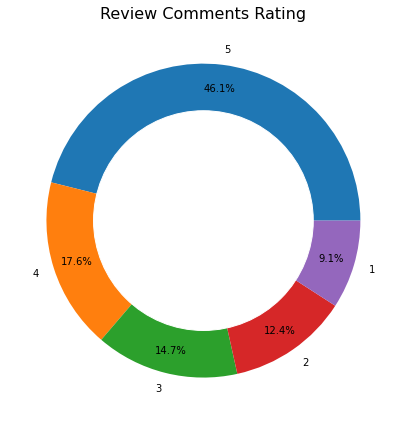

In [14]:
slices= df['rating'].value_counts()/len(df)*100
label = ['5','4','3','2','1']

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

plt.pie(slices, labels=label,autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Review Comments Rating",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show();

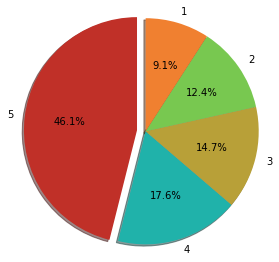

In [15]:
slices= df['rating'].value_counts()/len(df)*100
labels = ['5','4','3','2',1]
#plt.title('Review Comments Rating',fontdict={'fontsize': 19})
colors=['#C03028','lightseagreen','#B8A038','#78C850','#F08030']

plt.pie(slices,labels=labels,colors=colors,startangle=90,
       shadow='true', explode=(0.1,0,0,0,0),radius=1.3,autopct='%1.1f%%',pctdistance=0.6);

#Hexa color code for Seaborn:
    
'#78C850', # Grass
'#F08030', # Fire
'#6890F0', # Water
'#A8B820', # Bug
'#A8A878', # Normal
'#A040A0', # Poison
'#F8D030', # Electric
'#E0C068', # Ground
'#EE99AC', # Fairy
'#C03028', # Fighting
'#F85888', # Psychic
'#B8A038', # Rock
'#705898', # Ghost
'#98D8D8', # Ice
'#7038F8', # Dragon

In [47]:
len(df['rating'])

21178

In [48]:
df.groupby('rating').get_group(5).count()/len(df)

product    0.460808
title      0.460808
rating     0.460808
body       0.460808
text       0.460808
dtype: float64

In [49]:
# term frequency and inverse document frequency (TF-IDF)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
cntv = CountVectorizer(stop_words='english')

In [52]:
counts = cntv.fit_transform(df['text'])
counts

<21178x20230 sparse matrix of type '<class 'numpy.int64'>'
	with 532515 stored elements in Compressed Sparse Row format>

In [53]:
len(cntv.vocabulary_)

20230

In [54]:
freqs = zip(cntv.get_feature_names(), counts.sum(axis=0).tolist()[0])    
# sort from largest to smallest Top 20 words used in reviews
list_a=sorted(freqs, key=lambda x: -x[1])[:20]

In [55]:
al=[]
bl=[]
for (a,b) in list_a:
    al.append(a)
    bl.append(b)

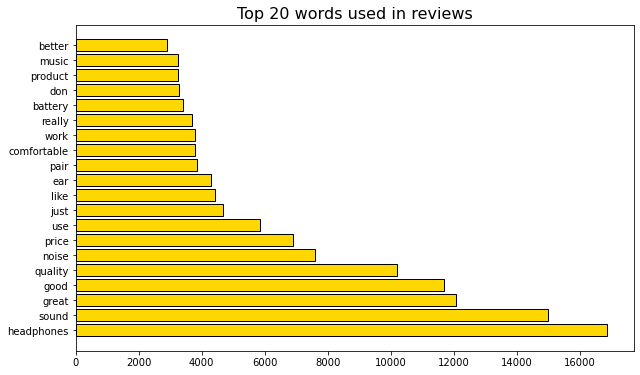

In [56]:
plt.figure(figsize = (10,6))
plt.barh(al,bl,color ='gold',edgecolor = 'k')#,linewidth = 3)
plt.title("Top 20 words used in reviews",fontsize = 16)          

plt.show()

In [57]:
from sklearn.feature_extraction.text import TfidfTransformer

In [58]:
tfidf_transformer = TfidfTransformer()

In [59]:
results = tfidf_transformer.fit_transform(counts)

In [60]:
results

<21178x20230 sparse matrix of type '<class 'numpy.float64'>'
	with 532515 stored elements in Compressed Sparse Row format>

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
tfidf = TfidfVectorizer(stop_words='english')

In [63]:
y = df['rating']
X = df['text']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [66]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [67]:

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [68]:
X_train_tfidf

<18001x18762 sparse matrix of type '<class 'numpy.float64'>'
	with 452572 stored elements in Compressed Sparse Row format>

In [69]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [70]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [71]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [72]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [73]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

NB MODEL
              precision    recall  f1-score   support

           1       0.72      0.38      0.50       503
           2       0.00      0.00      0.00       300
           3       0.33      0.01      0.01       372
           4       0.33      0.02      0.03       582
           5       0.49      1.00      0.66      1420

    accuracy                           0.51      3177
   macro avg       0.38      0.28      0.24      3177
weighted avg       0.43      0.51      0.38      3177



C:\Users\amink\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amink\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amink\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


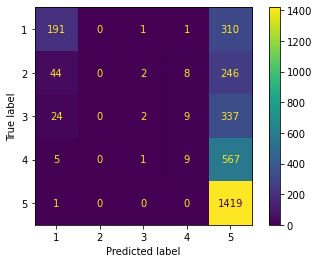

In [74]:
print("NB MODEL")
report(nb)

Logistic Regression
              precision    recall  f1-score   support

           1       0.66      0.75      0.70       503
           2       0.46      0.21      0.29       300
           3       0.40      0.31      0.35       372
           4       0.46      0.29      0.36       582
           5       0.72      0.92      0.81      1420

    accuracy                           0.64      3177
   macro avg       0.54      0.50      0.50      3177
weighted avg       0.60      0.64      0.61      3177



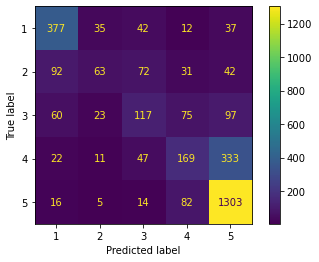

In [75]:
print("Logistic Regression")
report(log)

SVC
              precision    recall  f1-score   support

           1       0.68      0.72      0.70       503
           2       0.48      0.32      0.38       300
           3       0.36      0.30      0.33       372
           4       0.41      0.28      0.34       582
           5       0.73      0.89      0.80      1420

    accuracy                           0.63      3177
   macro avg       0.53      0.50      0.51      3177
weighted avg       0.60      0.63      0.60      3177



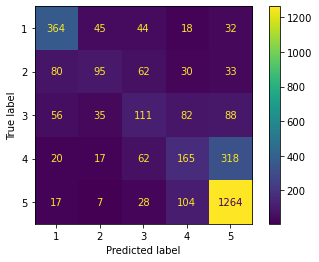

In [76]:
print('SVC')
report(svc)

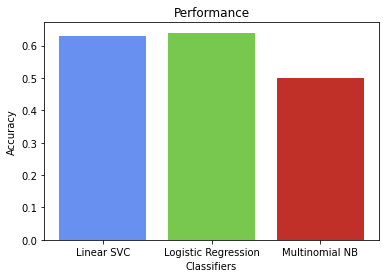

In [77]:
x=[1,2,3]
y=[0.63,0.64,0.5]
plt.title('Performance')
tick_label=['Linear SVC','Logistic Regression','Multinomial NB']
plt.ylabel('Accuracy')
plt.xlabel('Classifiers')
plt.bar(x,y,tick_label=tick_label,width=0.8,color=['#6890F0','#78C850','#C03028']);


Hexa color code for Seaborn:
    
'#78C850', # Grass
'#F08030', # Fire
'#6890F0', # Water
'#A8B820', # Bug
'#A8A878', # Normal
'#A040A0', # Poison
'#F8D030', # Electric
'#E0C068', # Ground
'#EE99AC', # Fairy
'#C03028', # Fighting
'#F85888', # Psychic
'#B8A038', # Rock
'#705898', # Ghost
'#98D8D8', # Ice
'#7038F8', # Dragon